# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Exploratory Data Analysis (EDA)*

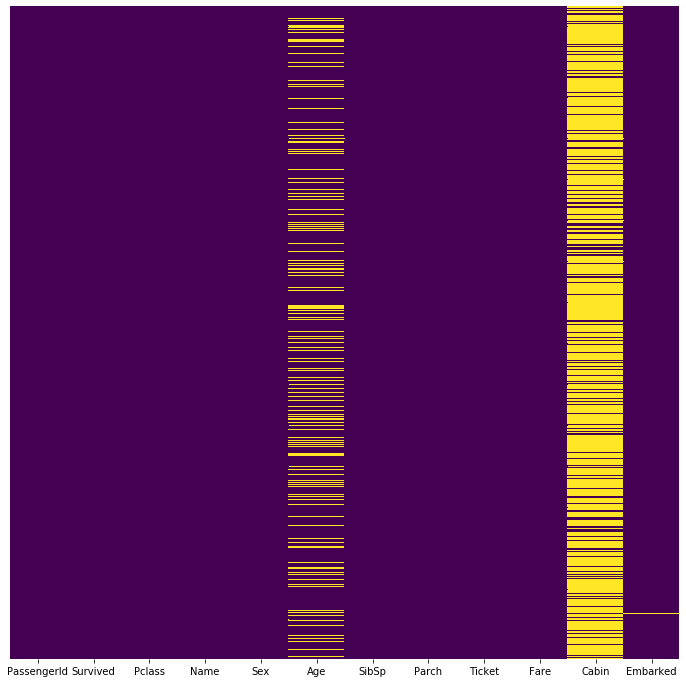

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
sns.set_style('whitegrid')

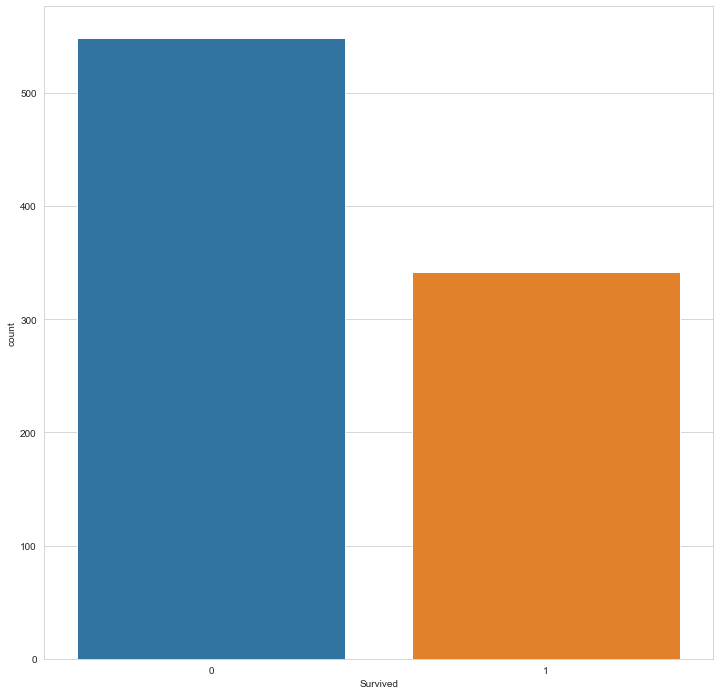

In [10]:
plt.figure(figsize=(12, 12))
sns.countplot(x='Survived', data=train)

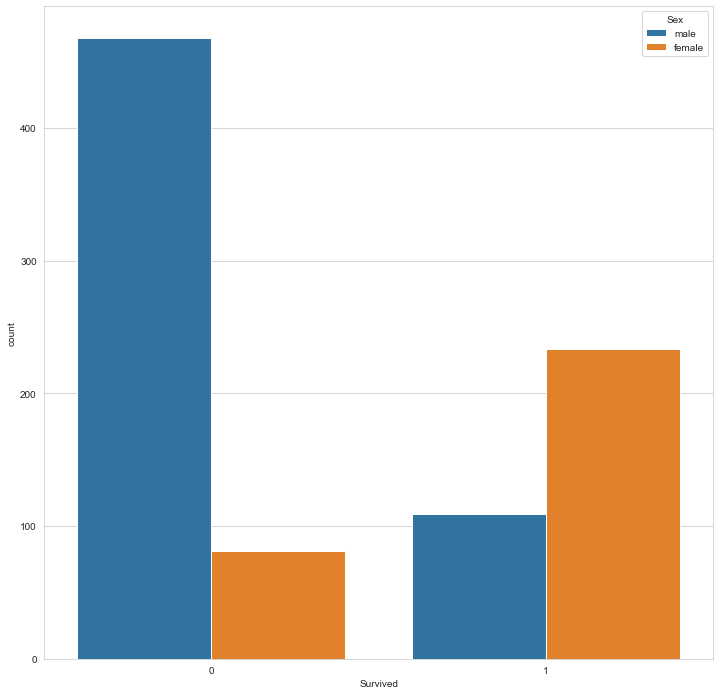

In [13]:
plt.figure(figsize=(12, 12))
sns.countplot(x='Survived', data=train, hue='Sex')

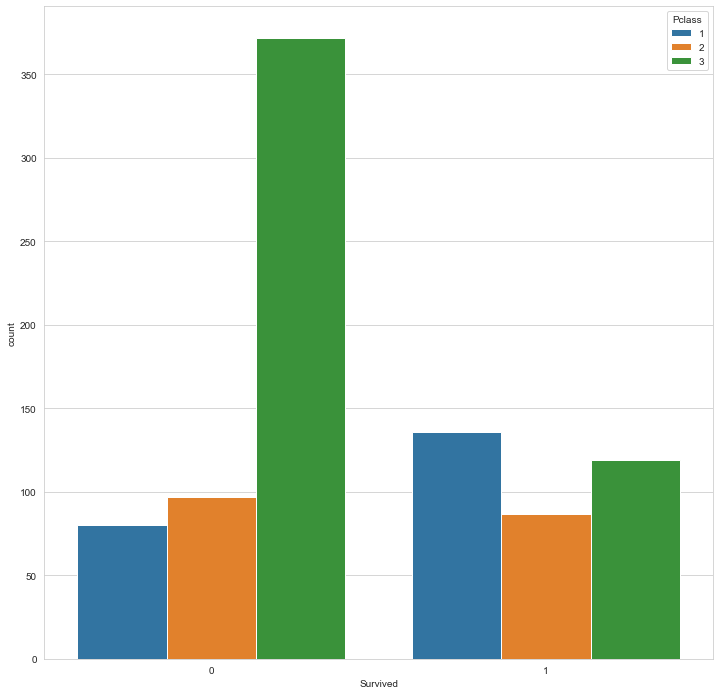

In [14]:
plt.figure(figsize=(12, 12))
sns.countplot(x='Survived', data=train, hue='Pclass')

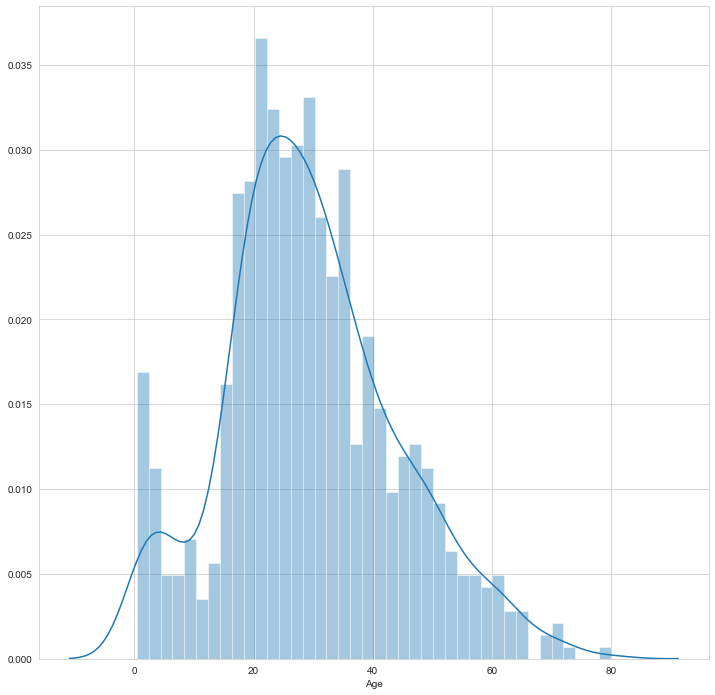

In [16]:
plt.figure(figsize=(12, 12))
sns.distplot(train['Age'].dropna(), bins=40)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


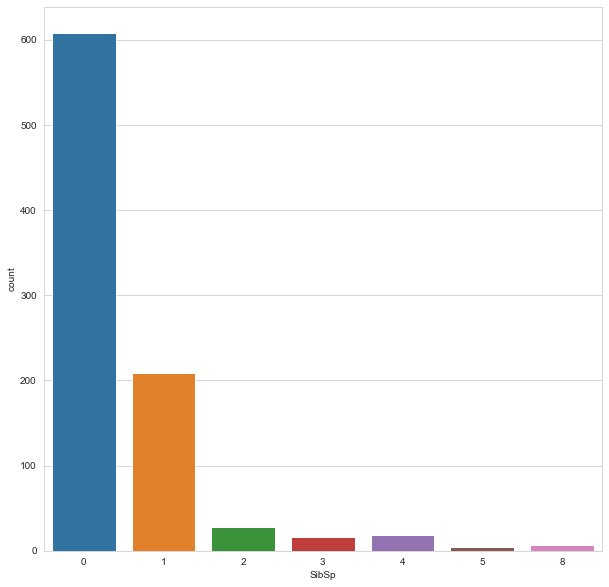

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(x='SibSp', data=train)

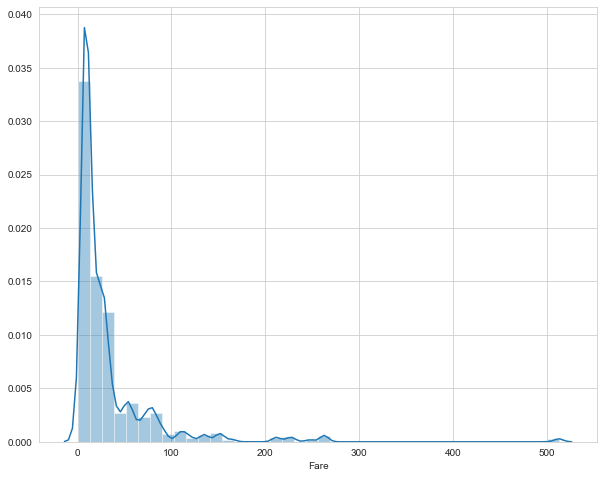

In [21]:
plt.figure(figsize=(10, 8))
sns.distplot(train['Fare'], bins=40)

*Data Cleaning*

###### For Age we can fill up the average age of pasangers per pasanger class

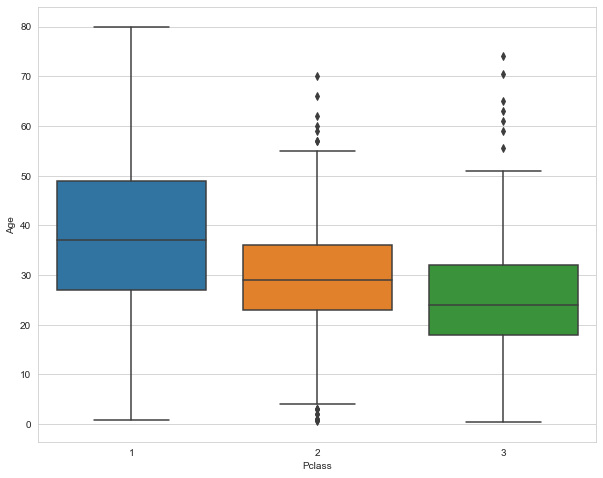

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [23]:
def age_approximation (cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            Age = 37
        elif Pclass == 2:
            Age = 29
        else:
            Age = 24
    
    return Age

In [24]:
train['Age'] = train[['Age', 'Pclass']].apply(age_approximation, axis=1)

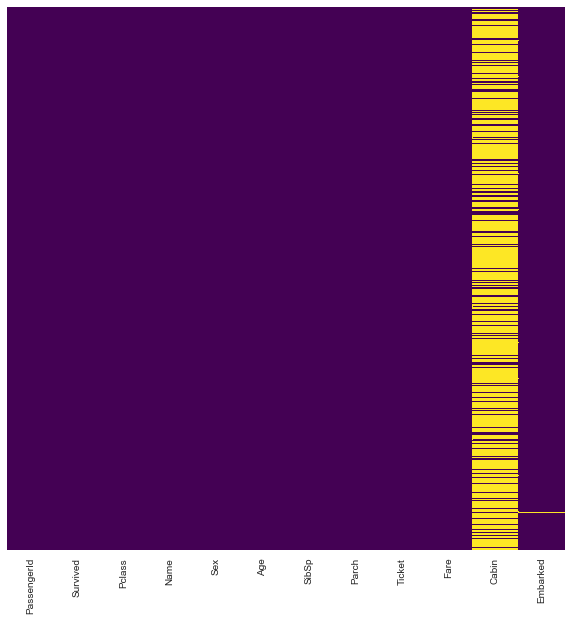

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

###### Dropping the Cabin column

In [27]:
train.drop('Cabin', axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


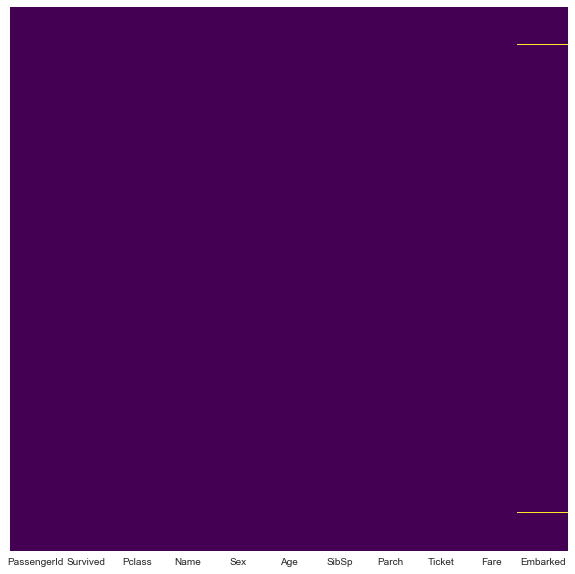

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

###### Dropping remaining null values

In [30]:
train.dropna(inplace=True)

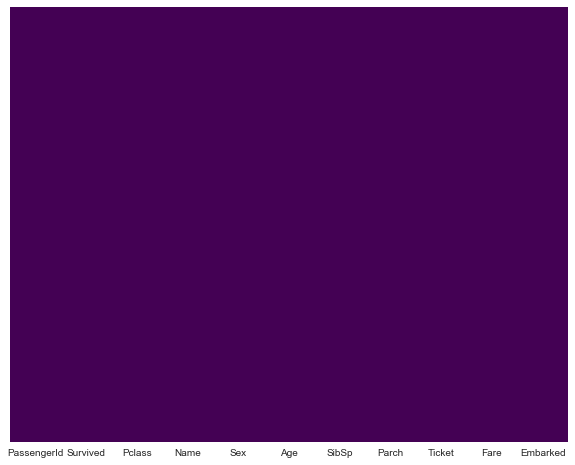

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

###### Changing Categorical data to Numerical data through dummy variables

In [32]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [33]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [35]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
train = pd.concat([train, sex, embark], axis=1)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


###### Dropping columns that are not required

In [38]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.drop('PassengerId', axis=1, inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


*Train Test Split*

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

*Model Fitting*

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lgm = LogisticRegression()

In [47]:
lgm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Making Predictions*

In [48]:
predictions = lgm.predict(X_test)

*Metrics*

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)